In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-03-11 04:45:42--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-03-11 04:45:42 (29.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1) #make X a Matrix of NxD instead of 1D array.'-1' means unspecified dimension. Here, D = 1.
Y = data[:, 1]

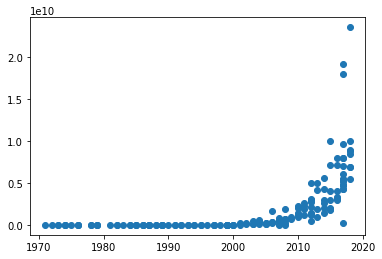

In [5]:
plt.scatter(X, Y)

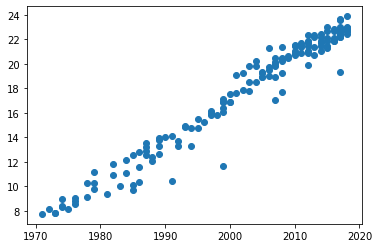

In [6]:
Y = np.log(Y) #To get a linear curve
plt.scatter(X, Y)

In [7]:
X = X - X.mean() #We don't divide the data by standard deviation, because after that an increase of 1 in X will not signify an increase of 1 year. To make things less complicated, we try just centering the data around 0.

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = (1,)), tf.keras.layers.Dense(1)]) #activation = None is default in Dense layer
model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule) #Accepts a function as defined above as input.
r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])      

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 345.4089 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 281.3907 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 240.2634 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 239.3780 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 190.2016 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 230.3010 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 228.5588 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 220.7395 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 145.1801 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 73.6289 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss

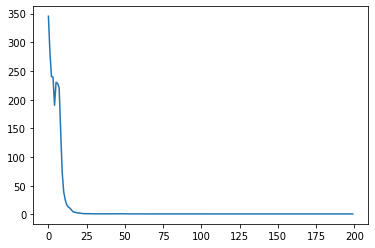

In [9]:
plt.plot(r.history['loss'], label = 'loss')

In [ ]:
print(model.layers) #The Input layer does not count as we can clearly see.

In [ ]:
print(model.layers[0].get_weights()) #We get weights from the Dense layer. For linear regression(y = wx + b), this basically means the slope(w) and Y-intercept(b). In general, if D is the Input size and N is the output size, we get W as DxM matrix, and b an array of length N.

[array([[0.33540052]], dtype=float32), array([17.760996], dtype=float32)]


In [10]:
a = model.layers[0].get_weights()[0][0, 0] #Addressing the value stored in W(1,1).

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [11]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0269209590003547


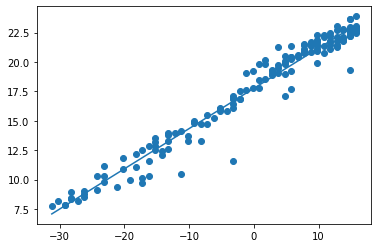

In [12]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [ ]:
#Manual Calculation:
w, b = model.layers[0].get_weights()
X = X.reshape(-1)

True